# Electric Vehicle Sales by State in India  
## Data Analytics & Machine Learning Project

India is rapidly moving towards sustainable transportation and electric mobility.
The government is promoting Electric Vehicles (EVs) to reduce pollution, fuel dependency,
and carbon emissions.

This project analyzes Electric Vehicle sales across different states in India to:
- Understand EV adoption trends
- Identify high-growth states
- Analyze vehicle category demand
- Build a machine learning model to predict EV sales

The insights from this project can help policymakers, investors, and manufacturers
make data-driven decisions.


## Project Objectives

1. Analyze EV sales growth in India
2. Study state-wise EV adoption
3. Identify top-performing vehicle categories
4. Perform exploratory data analysis (EDA)
5. Build a machine learning model to predict EV sales
6. Generate business insights for EV market growth


In [47]:
# Install required Python libraries
!pip install pandas numpy matplotlib seaborn scikit-learn


In [48]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Ignore warnings for clean output
import warnings
warnings.filterwarnings("ignore")


In [49]:
# Upload dataset from local system to Colab
from google.colab import files
uploaded = files.upload()


Saving Electric Vehicle Sales by State in India.csv to Electric Vehicle Sales by State in India (2).csv


In [50]:
# Load EV sales dataset into pandas DataFrame
df = pd.read_csv("Electric Vehicle Sales by State in India.csv")

# Display first 5 rows of dataset
df.head()


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [51]:
# Check dataset shape (rows, columns)
df.shape


(96845, 8)

In [52]:
# Display dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [53]:
# Display statistical summary
df.describe()


,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


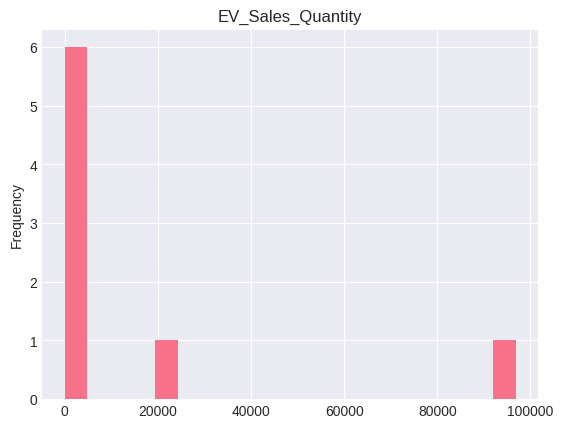

In [54]:
from matplotlib import pyplot as plt
_df_20['EV_Sales_Quantity'].plot(kind='hist', bins=20, title='EV_Sales_Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [55]:
# Check for missing values in each column
df.isnull().sum()


,0
Year,0
Month_Name,0
Date,0
State,0
Vehicle_Class,0
Vehicle_Category,0
Vehicle_Type,0
EV_Sales_Quantity,0


In [56]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year and Month from Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Display updated dataset
df.head()


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Month
0,2014,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0,1
1,2014,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0,1
2,2014,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0,1
3,2014,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0,1
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0,1


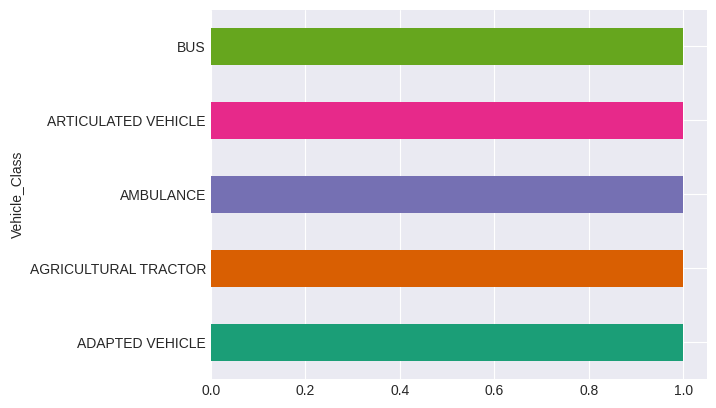

In [57]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('Vehicle_Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [58]:
# Calculate total EV sales in India
total_sales = df['EV_Sales_Quantity'].sum()

# Print total sales
print("Total EV Sales in India:", total_sales)


Total EV Sales in India: 3593811.0


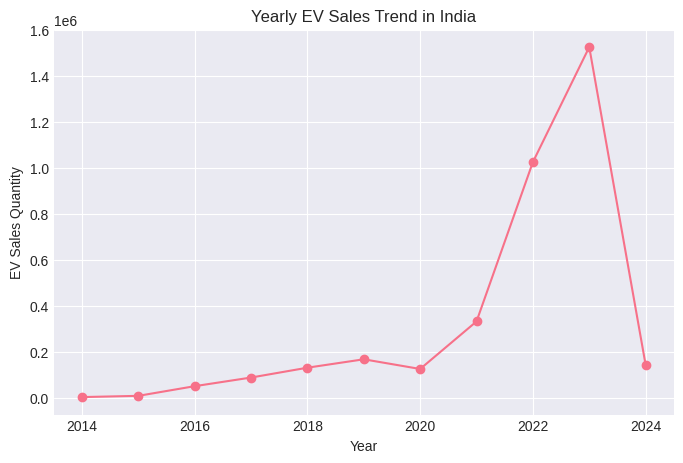

In [59]:
# Group EV sales by year
yearly_sales = df.groupby('Year')['EV_Sales_Quantity'].sum()

# Plot yearly EV sales trend
plt.figure(figsize=(8,5))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o')
plt.xlabel("Year")
plt.ylabel("EV Sales Quantity")
plt.title("Yearly EV Sales Trend in India")
plt.show()


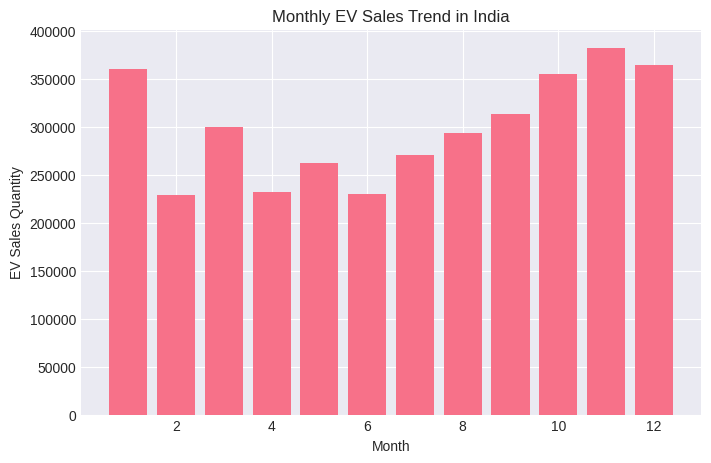

In [60]:
# Group EV sales by month
monthly_sales = df.groupby('Month')['EV_Sales_Quantity'].sum()

# Plot monthly EV sales trend
plt.figure(figsize=(8,5))
plt.bar(monthly_sales.index, monthly_sales.values)
plt.xlabel("Month")
plt.ylabel("EV Sales Quantity")
plt.title("Monthly EV Sales Trend in India")
plt.show()


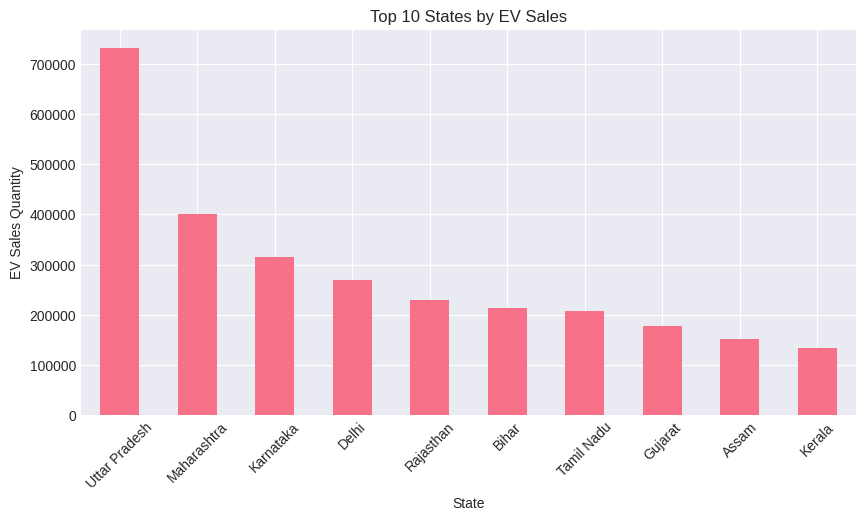

In [61]:
# Group EV sales by state
state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False)

# Plot top 10 states by EV sales
plt.figure(figsize=(10,5))
state_sales.head(10).plot(kind='bar')
plt.xlabel("State")
plt.ylabel("EV Sales Quantity")
plt.title("Top 10 States by EV Sales")
plt.xticks(rotation=45)
plt.show()


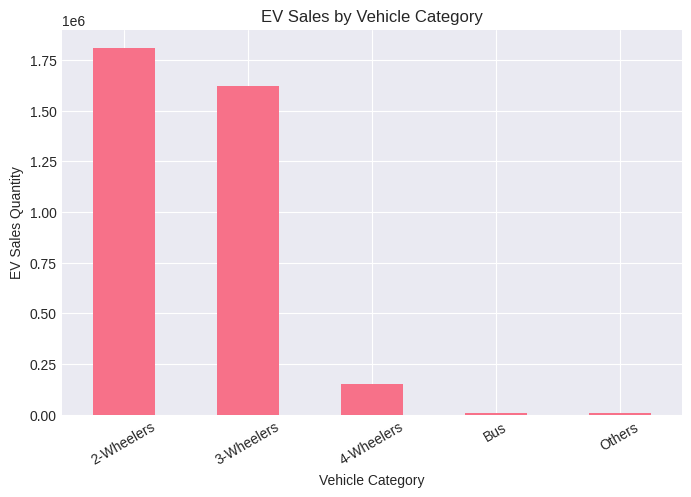

In [62]:
# Group EV sales by vehicle category
category_sales = df.groupby('Vehicle_Category')['EV_Sales_Quantity'].sum()

# Plot vehicle category sales
plt.figure(figsize=(8,5))
category_sales.plot(kind='bar')
plt.xlabel("Vehicle Category")
plt.ylabel("EV Sales Quantity")
plt.title("EV Sales by Vehicle Category")
plt.xticks(rotation=30)
plt.show()


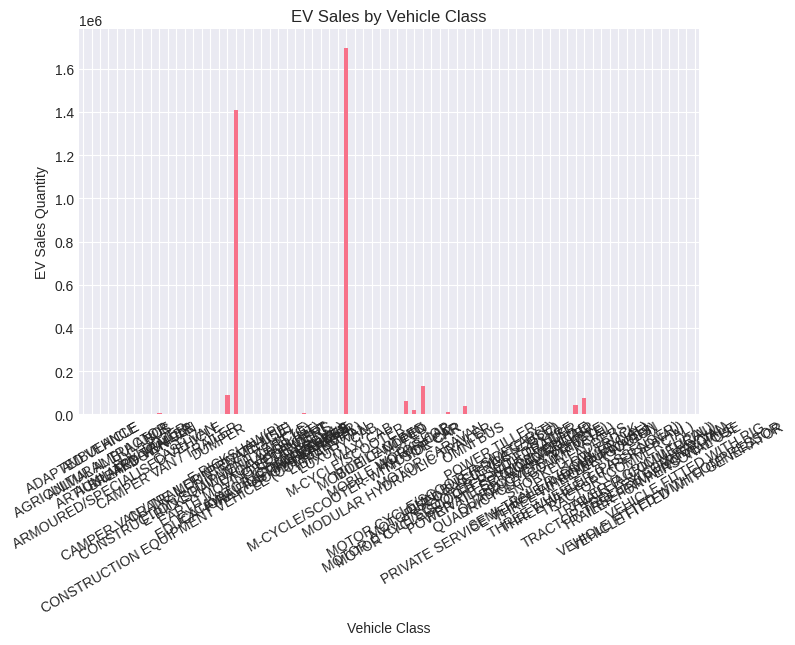

In [63]:
# Group EV sales by vehicle class
class_sales = df.groupby('Vehicle_Class')['EV_Sales_Quantity'].sum()

# Plot vehicle class sales
plt.figure(figsize=(8,5))
class_sales.plot(kind='bar')
plt.xlabel("Vehicle Class")
plt.ylabel("EV Sales Quantity")
plt.title("EV Sales by Vehicle Class")
plt.xticks(rotation=30)
plt.show()


In [64]:
# Create a copy of dataset for ML
ml_df = df.copy()

# Encode categorical columns using Label Encoding
le = LabelEncoder()
ml_df['State'] = le.fit_transform(ml_df['State'])
ml_df['Vehicle_Class'] = le.fit_transform(ml_df['Vehicle_Class'])
ml_df['Vehicle_Category'] = le.fit_transform(ml_df['Vehicle_Category'])
ml_df['Vehicle_Type'] = le.fit_transform(ml_df['Vehicle_Type'])

# Select features and target variable
X = ml_df[['Year', 'Month', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']]
y = ml_df['EV_Sales_Quantity']


In [65]:
# Split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [66]:
# Create Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train model on training data
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [67]:
# Predict EV sales on test data
y_pred = rf_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print model performance
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 132.0264839056438


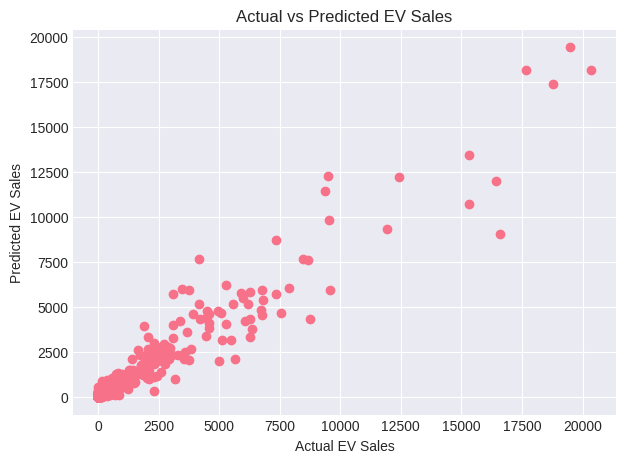

In [68]:
# Plot actual vs predicted EV sales
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual EV Sales")
plt.ylabel("Predicted EV Sales")
plt.title("Actual vs Predicted EV Sales")
plt.show()


In [73]:
# Get feature importance from Random Forest model
feature_importance = rf_model.feature_importances_

# Create DataFrame for feature importance
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Display feature importance
importance_df


,Feature,Importance
2,State,0.500666
0,Year,0.156545
3,Vehicle_Class,0.151038
5,Vehicle_Type,0.081071
4,Vehicle_Category,0.058394
1,Month,0.052286


## Business Insights

1. EV sales in India are growing year by year, showing strong market adoption.
2. Certain states contribute significantly to total EV sales.
3. Two-wheelers dominate EV sales compared to other vehicle categories.
4. Vehicle category and state are strong drivers of EV demand.
5. Government policies and infrastructure directly impact EV adoption.


## Conclusion & Market Strategy

India's EV market is expanding rapidly with strong growth potential.

### Key Recommendations:
1. Focus charging infrastructure development in high-growth states.
2. Promote EV adoption in low-performing states through subsidies.
3. Increase production of two-wheeler EVs due to high demand.
4. Support commercial EV adoption for logistics and public transport.

This project demonstrates how data analytics and machine learning
can help accelerate India's transition to electric mobility.
